In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud

In [36]:
#Natural language processing
# 1) Natural language Toolkit
# 2) stopwords - a collection of words
# 3) WordNetLemmatizer

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [38]:
#sklearn package
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve
import scikitplot
from scikitplot.metrics import plot_confusion_matrix

In [40]:
#reading of data
df_train=pd.read_csv("train.txt",delimiter=';',names=['text','label'])
df_train.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [41]:
df_val=pd.read_csv('val.txt',delimiter=';',names=['text','label'])
df_val.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [42]:
# Concatenate
df = pd.concat([df_train,df_val])
df.shape

(18000, 2)

In [43]:
df.reset_index(inplace=True, drop=True)

In [44]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [45]:
df.shape

(18000, 2)

In [46]:
df['label'].value_counts()

joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: label, dtype: int64

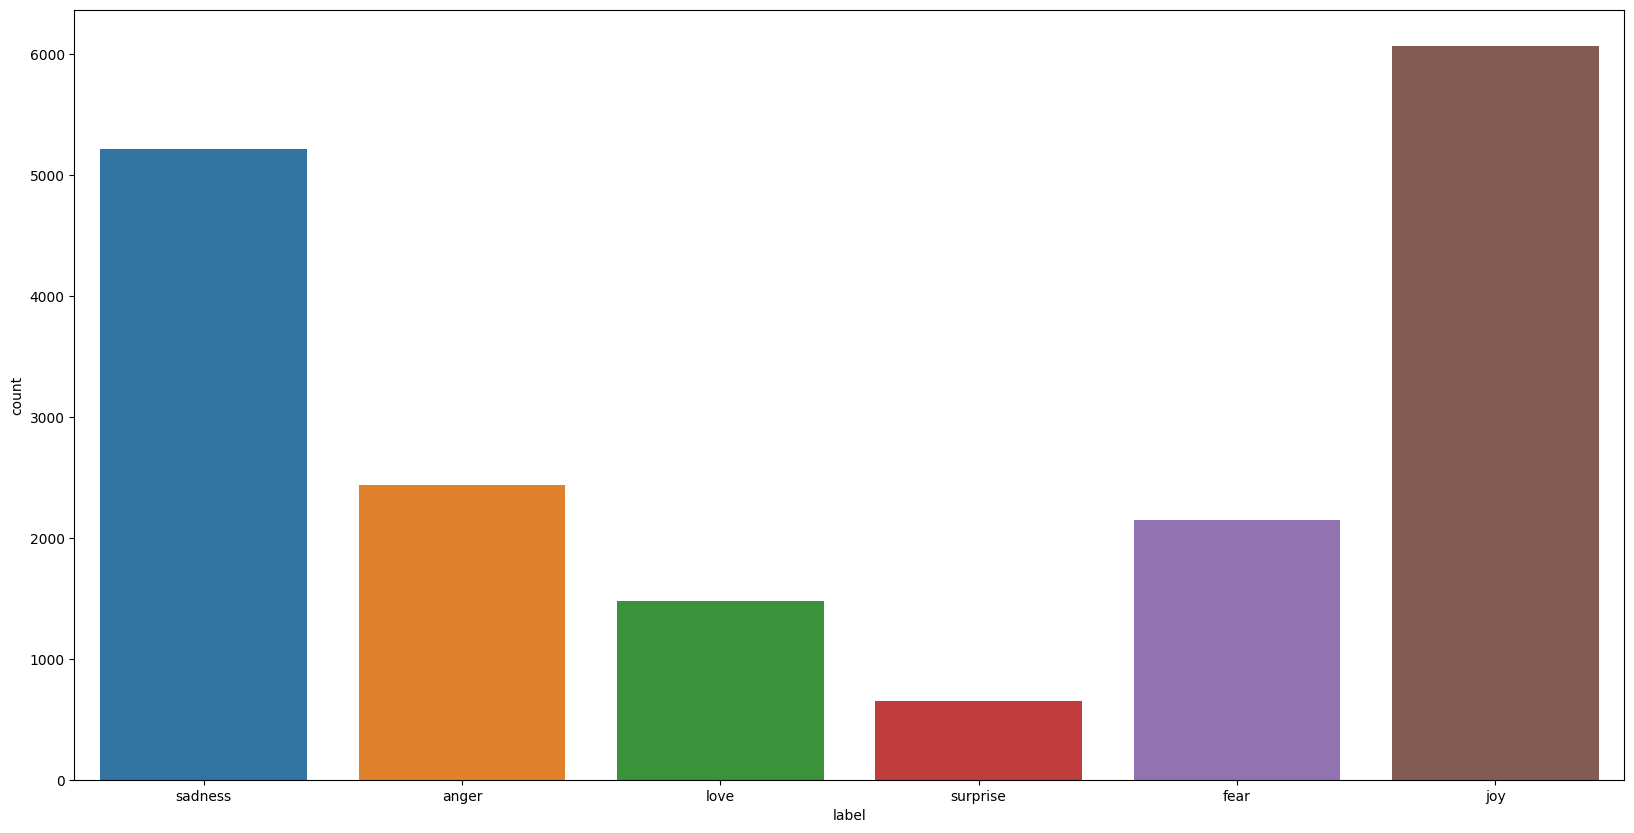

In [47]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['label'])
plt.show()

In [48]:
#positive sentiment :- joy, love, suprise value 1
#negative sentiment : sadness, anger, fear value 0

In [49]:
def custom_encoder(df):
    df.replace(to_replace="surprise", value=1, inplace=True)
    df.replace(to_replace="love",     value=1, inplace=True)
    df.replace(to_replace="joy",      value=1, inplace=True)
    df.replace(to_replace="sadness",  value=0, inplace=True)
    df.replace(to_replace="anger",    value=0, inplace=True)
    df.replace(to_replace="fear",     value=0, inplace=True)

In [50]:
custom_encoder(df['label'])

In [51]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


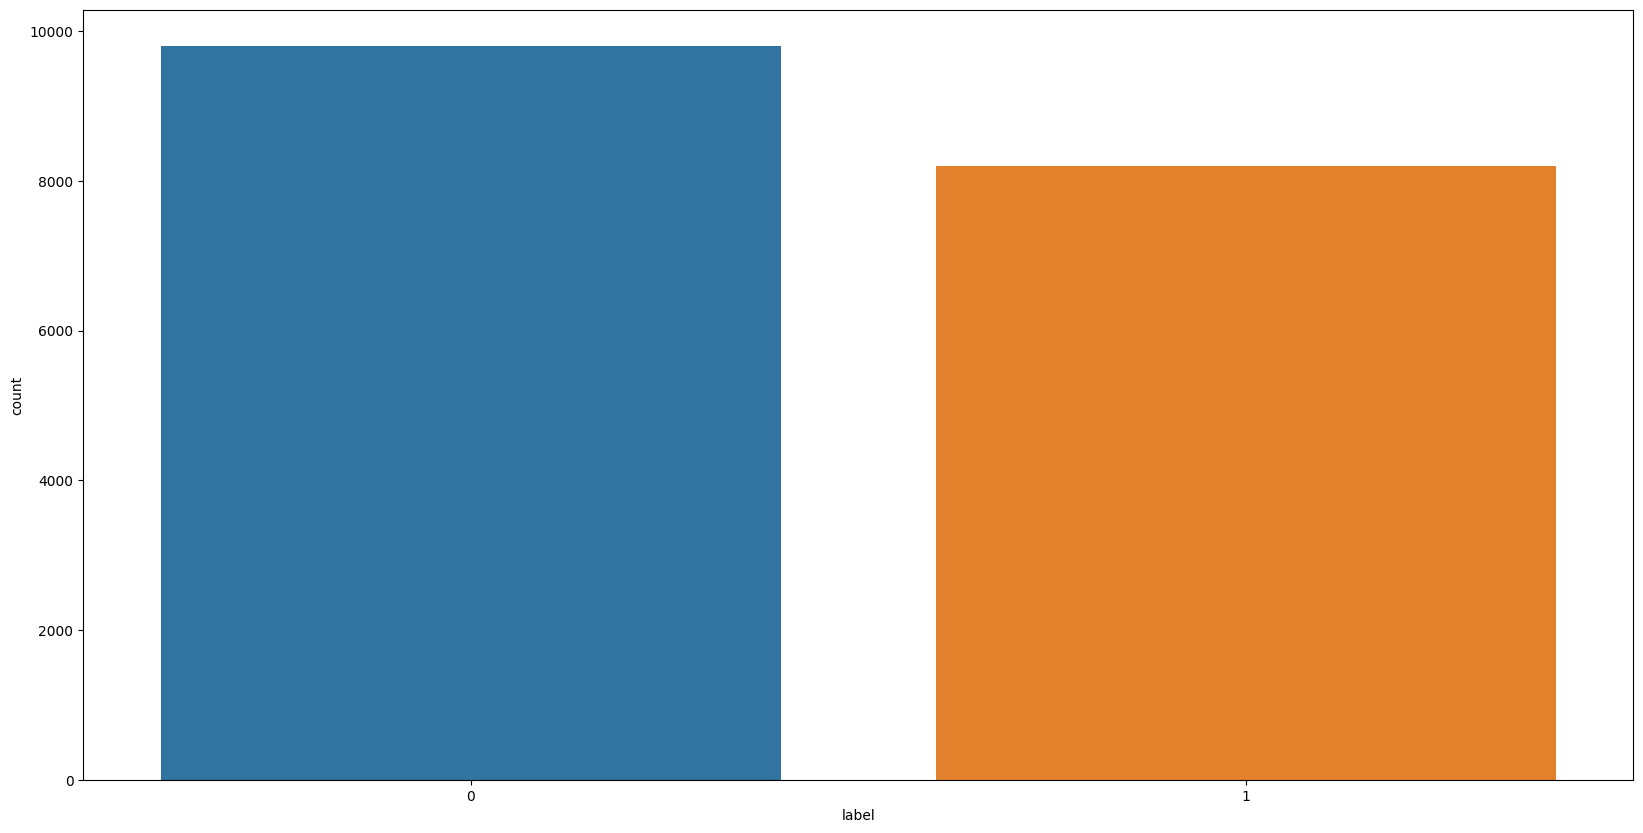

In [52]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['label'])
plt.show()

In [53]:
#Data Preprocessing

### lemmatization is the process of grouping together the different inflected forms of a words so they can be analyzed as a single item.

In [54]:
import nltk
nltk.download('wordnet')

lm = WordNetLemmatizer()
print('rocks: ',   lm.lemmatize('rocks'))
print('corpora: ', lm.lemmatize('corpora'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


rocks:  rock
corpora:  corpus


In [55]:
df['text']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
17995    im having ssa examination tomorrow in the morn...
17996    i constantly worry about their fight against n...
17997    i feel its important to share this info for th...
17998    i truly feel that if you are passionate enough...
17999    i feel like i just wanna buy any cute make up ...
Name: text, Length: 18000, dtype: object

In [56]:
def text_transformation(df_col):
    corpus=[]
    for item in df_col:
        new_item=re.sub('[^a-zA-Z]',' ',str(item))
        new_item=new_item.lower()
        new_item=new_item.split()
        new_item=[lm.lemmatize(word)for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x)for x in new_item))
    return corpus

In [58]:
import nltk
nltk.download('stopwords')

corpus = text_transformation(df['text'])
corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

In [59]:
word_cloud=""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)

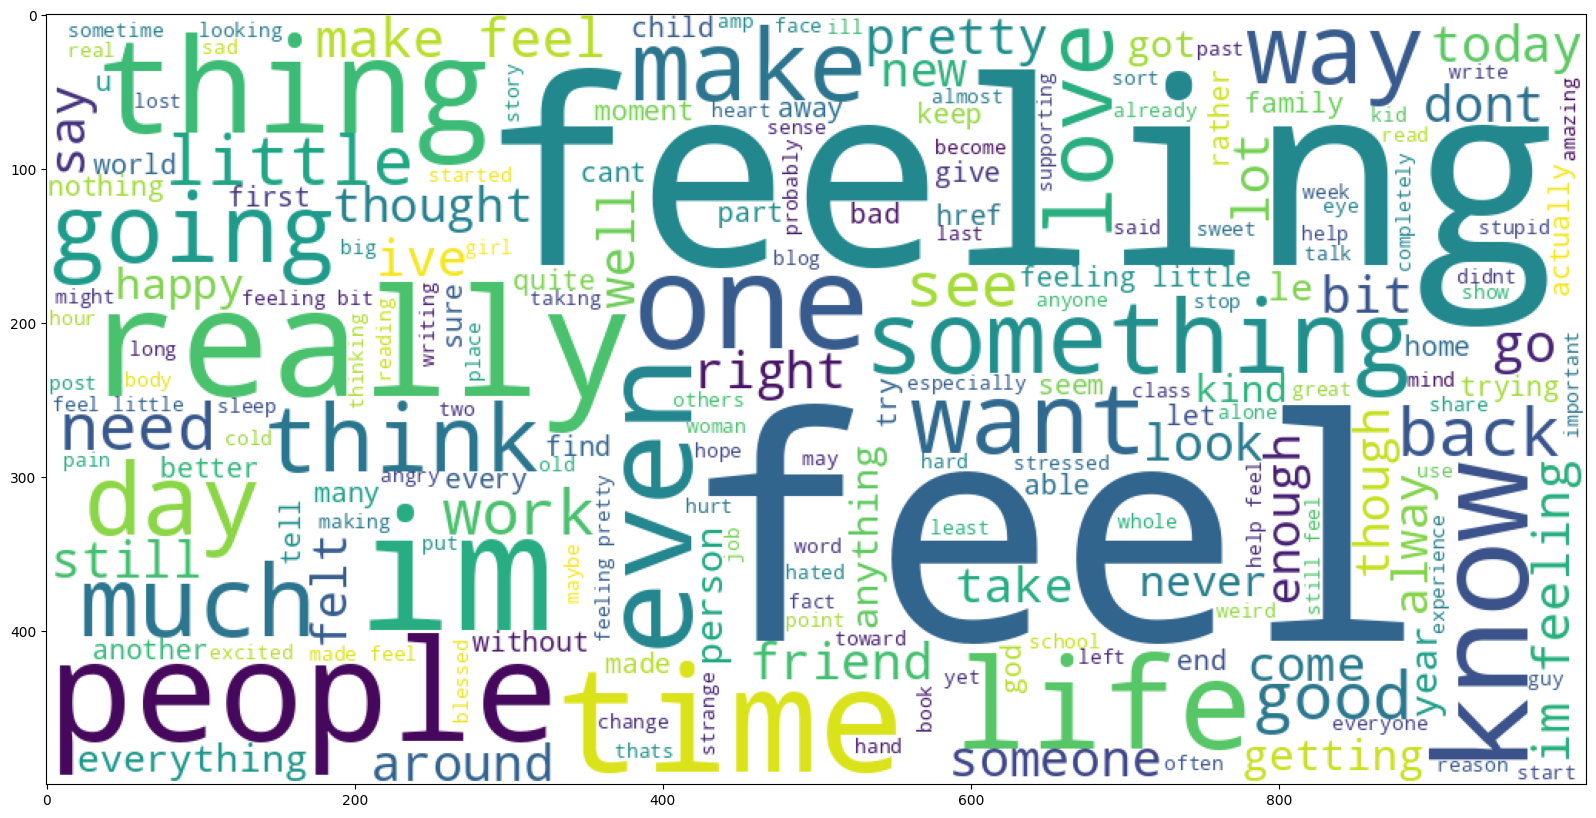

In [60]:
plt.figure(figsize=(20,10))
wordcloud=WordCloud(font_path=None,
    width=1000,
    height=500,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=10,
    stopwords=None,
    random_state=None,
    background_color='white',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30).generate(word_cloud)
plt.imshow(wordcloud)

In [61]:
cv=CountVectorizer(ngram_range=(1,2))
traindata=cv.fit_transform(corpus)

In [62]:
X=traindata
y=df.label

In [63]:
rf=RandomForestClassifier(n_estimators=500,
    criterion='gini',
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None)

In [64]:
rf.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_split=5,
                       n_estimators=500)

In [65]:
test_df=pd.read_csv('test.txt',delimiter=';',names=['text','label'])

In [66]:
test_df.head(3)

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness


In [67]:
X_test,y_test=test_df.text,test_df.label

In [68]:
test_df=custom_encoder(y_test)

In [69]:
#pre-processing
test_corpus=text_transformation(X_test)

In [70]:
#convert text data into vector
testdata=cv.transform(test_corpus)

In [71]:
prediction=rf.predict(testdata)

In [72]:
prediction

array([0, 0, 0, ..., 1, 1, 0])

In [73]:
print(accuracy_score(y_test,prediction)*100)

96.1


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

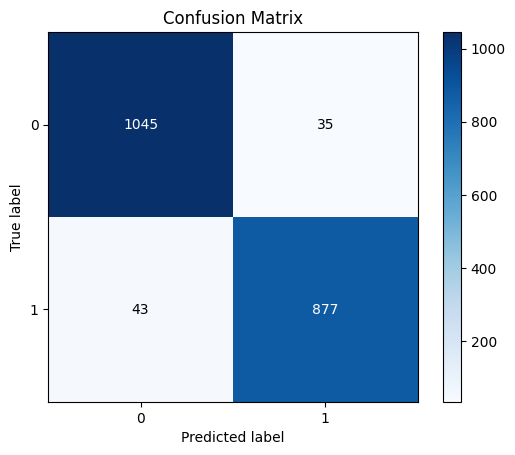

In [76]:
scikitplot.metrics.plot_confusion_matrix(y_test,prediction)

In [77]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1080
           1       0.96      0.95      0.96       920

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [78]:
def expressin_check(prediction_input):
    if prediction_input==0:
        print("Input statement has negative sentiment")
    elif prediction_input==1:
        print("Input statement has positive sentiment")
    else:
        print("invalid statement")

In [79]:
def sentiment_predictor(input):
    input=text_transformation(input)
    transformed_input=cv.transform(input)
    prediction=rf.predict(transformed_input)
    expressin_check(prediction)

In [80]:
input_statement=["sometimes I just want to punch someone in the face."]
sentiment_predictor(input_statement)

Input statement has negative sentiment


In [81]:
input_statement=["hello i am very happy and want to give treats"]
sentiment_predictor(input_statement)

Input statement has positive sentiment


In [82]:
import pickle
with open('sentimental_model','wb')as f:
    pickle.dump(rf,f)

In [83]:
with open('counter_vector_model', "wb") as file:
    pickle.dump(cv, file)